In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [98]:
data = pd.read_csv('analytics.csv')

In [99]:
data.head()

,Unnamed: 0,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount,Total_time_elapsed
0,0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0,0 days 00:24:18.000000000
1,1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0,0 days 00:32:34.000000000
2,2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0,0 days 01:17:35.000000000
3,3,22 19:47:53,22 19:56:08,22 20:01:20,22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.0,0 days 00:30:08.000000000
4,4,03 19:01:52,03 19:09:08,03 19:36:20,03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.0,0 days 00:43:34.000000000


In [100]:
data = data.select_dtypes(include=['int', 'float'])

In [101]:
data.head()

,Unnamed: 0,Driver_ID,Restaurant_ID,Consumer_ID,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
0,0,86,12,5,20.45,20.45,3.07,0.0
1,1,325,66,5,40.62,40.62,3.73,0.0
2,2,200,124,5,37.78,37.78,1.89,0.0
3,3,154,5,14,39.66,0.00,1.98,0.0
4,4,332,9,14,39.66,0.00,5.95,0.0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18078 entries, 0 to 18077
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          18078 non-null  int64  
 1   Driver_ID           18078 non-null  int64  
 2   Restaurant_ID       18078 non-null  int64  
 3   Consumer_ID         18078 non-null  int64  
 4   Order_total         18078 non-null  float64
 5   Amount_of_discount  18078 non-null  float64
 6   Amount_of_tip       18078 non-null  float64
 7   Refunded_amount     18078 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.1 MB


In [103]:
data.describe()

,Unnamed: 0,Driver_ID,Restaurant_ID,Consumer_ID,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
count,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000
mean,9038.500000,222.448169,108.721263,32010.313475,51.261496,1.356706,3.492022,0.612091
std,5218.813419,105.219194,98.609766,42010.215766,50.599675,6.516667,3.700115,6.073104
min,0.000000,7.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,4519.250000,141.000000,23.000000,4243.500000,26.660000,0.000000,1.400000,0.000000
50%,9038.500000,227.000000,77.000000,10972.000000,38.630000,0.000000,2.550000,0.000000
75%,13557.750000,314.000000,186.000000,56857.000000,57.885000,0.000000,4.460000,0.000000
max,18077.000000,438.000000,409.000000,200449.000000,1604.130000,187.880000,120.300000,414.770000


In [104]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
model = RandomForestRegressor()

In [106]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [107]:
cv = 5

In [108]:
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [109]:
best_model = grid_search.best_estimator_

In [110]:
y_pred = best_model.predict(X_test)

In [111]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 22.796789869701914
R-squared: -0.03736733930377434


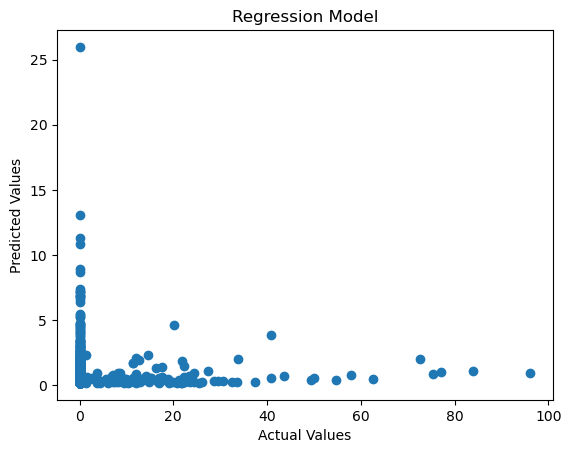

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Model")
plt.show()

Text(0.5, 1.0, 'Histogram of Delivery Tips in DoorDash Dataset')

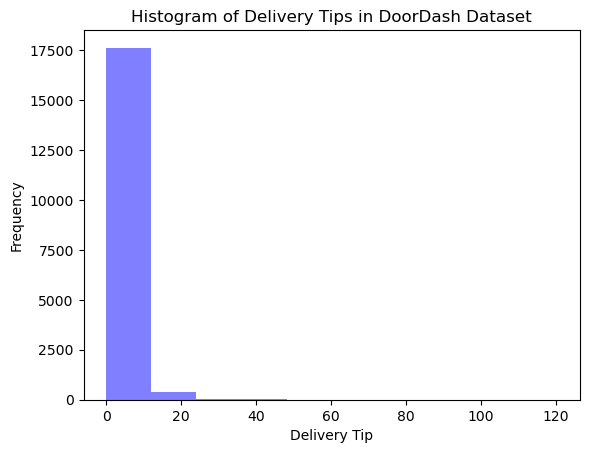

In [120]:
plt.hist(data['Amount_of_tip'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Delivery Tip')
plt.ylabel('Frequency')
plt.title('Histogram of Delivery Tips in DoorDash Dataset')